# OISSTv2 Live Update Testing

This notebook is for documenting the steps to build a single annual OISSTv2 file using update caches. The steps were developed initially in `Update_01_Download_OISST` then the steps were abstracted into functions and placed into the `oisstools.py` module. This notebook will follow the same steps but with much less code, hopefully with less room for error.

In [1]:
# Libraries
from bs4 import BeautifulSoup
import requests
import os
import xarray as xr
import datetime
import oisstools as ot


#### 1. Set workspace
workspace = "local"

# Root paths
root_locations = {"local"  : "/Users/akemberling/Box/",
                  "docker" : "/home/jovyan/"}

# Set root with workspace
box_root = root_locations[workspace]

# Global cache root
_cache_root = f"{box_root}RES_Data/OISST/oisst_mainstays/"



#### 2. What Months are we checking?
now = datetime.datetime.now()
update_yr  = now.year
# this_month = str(now.month).rjust(2, "0")
# last_month = str(now.month - 1 if now.month > 1 else 12).rjust(2, "0")

this_month = "02"
last_month = "01"



#### 3. Print Last Update
print(f"Working via {workspace} directory at: {box_root}")
print(f"Most recently updated:          {now.strftime('%Y-%m-%d')}")
print(f"Updated using months:           {last_month} & {this_month}")

Working via local directory at: /Users/akemberling/Box/
Most recently updated:          2021-03-01
Updated using months:           01 & 02


## 1. Update Last Month

In [5]:
# Use cache_oisst function to update cache for last month
ot.cache_oisst(cache_month = last_month, 
               update_yr = update_yr, 
               workspace = workspace, 
               verbose = True)

Caching Daily NETCDF File: oisst-avhrr-v02r01.20210101.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210102.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210103.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210104.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210105.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210106.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210107.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210108.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210109.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210110.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210111.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210112.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210113.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210114.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210115.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210116.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210117.nc
Caching Daily 

## 2. Update This Month

In [6]:
# Use cache_oisst function to update cache for last month
ot.cache_oisst(cache_month = this_month, 
               update_yr = update_yr, 
               workspace = workspace, 
               verbose = True)

Caching Daily NETCDF File: oisst-avhrr-v02r01.20210201.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210202.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210203.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210204.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210205.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210206.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210207.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210208.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210209.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210210.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210211.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210212.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210213.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210214.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210215_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20210216_preliminary.nc
Caching Daily NETCDF File: oisst-avhrr-v02r01.20

## 3. Build Annual File

In [8]:
# # The same year file that will try to load to append to:
# update_yr = datetime.datetime.now().year
# last_file = int(update_yr)-1
# last_yr_oisst = xr.open_dataset(f"~/Box/RES_Data/OISST/oisst_mainstays/annual_observations/sst.day.mean.{last_file}.v2.nc")
# last_yr_oisst

In [7]:
# # Compare to some single file
# test_day = xr.open_dataset(f"~/Box/RES_Data/OISST/oisst_mainstays/update_caches/01/oisst-avhrr-v02r01.20210101.nc")
# test_day

In [2]:
# Assemble the annual file
oisst_update = ot.build_annual_from_cache(last_month = last_month, 
                                          this_month = this_month, 
                                          workspace = workspace, 
                                          verbose = True)

## 4. Check Annual file

Want to see consistency in the dimensions, and data from the beginning of the year through to the update month.

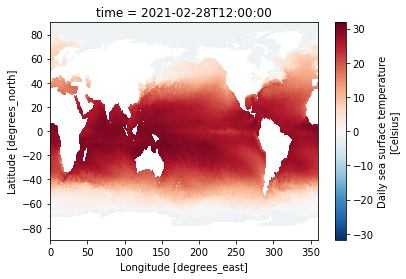

In [3]:
oisst_update
oisst_update.isel(time = -1).sst.plot()

## 5. Export Update

In [6]:
# Build out destination folder:
out_folder       = f"{_cache_root}annual_observations/"
naming_structure = f"sst.day.mean.{update_yr}.v2test.nc"
out_path         = f"{out_folder}{naming_structure}"
print(f"Output Path Set to:")
print(f"{out_path}")

Output Path Set to:
/Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/annual_observations/sst.day.mean.2021.v2test.nc


In [7]:
# Save File to Output Path
oisst_update.to_netcdf(path = out_path)
print(f"Saving / Overwriting File:")
print(f"{out_path}")

Saving / Overwriting File:
/Users/akemberling/Box/RES_Data/OISST/oisst_mainstays/annual_observations/sst.day.mean.2021.v2test.nc


# File has been saved with "test"

At this point there is not a resolved solution for the following issues. Xarray does not allow you to load a file, make changes and re-save it to the same file name. This in some ways is helpful because it prevents data loss if there is a problem with the update. However, this means an additional step is necessary to ensure there was not an issue, and change the file name.